# Importing Libraries

In [59]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Loading the titanic dataset

In [60]:
titanic = pd.read_csv("titanicdataset.csv")

#  Display the first five rows and last five rows

In [61]:
print(titanic.head())
print(titanic.tail())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
     Survived  Pclass                            Name     Sex   Age  \
882         0       2 

# Data preprocessing

In [62]:
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [63]:
titanic.shape

(887, 8)

In [64]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [65]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Sex'] = titanic['Sex'].replace({'male': 0, 'female': 1})

In [66]:
print(titanic.head(10))
print(titanic.tail())

   Survived  Pclass                                               Name  Sex  \
0         0       3                             Mr. Owen Harris Braund    0   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...    1   
2         1       3                              Miss. Laina Heikkinen    1   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle    1   
4         0       3                            Mr. William Henry Allen    0   
5         0       3                                    Mr. James Moran    0   
6         0       1                             Mr. Timothy J McCarthy    0   
7         0       3                      Master. Gosta Leonard Palsson    0   
8         1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson    1   
9         1       2                 Mrs. Nicholas (Adele Achem) Nasser    1   

    Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0  22.0                        1                        0   7

# Define the features and target variable

In [67]:
features = ['Pclass', 'Age', 'Sex']
X = titanic[features]  # Features (independent variables)
y = titanic['Survived']  # Target variable (dependent variable)


# Split the data into training and testing sets 80% for training, 20% for testing

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Logistic Regression model and train the model and make predictions


In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model


In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.76


# Generate and print a classification report, which includes precision, recall, and F1-score

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       111
           1       0.73      0.60      0.66        67

    accuracy                           0.76       178
   macro avg       0.75      0.73      0.74       178
weighted avg       0.76      0.76      0.76       178



# Create a heatmap of the confusion matrix to visualize model performance

<Axes: >

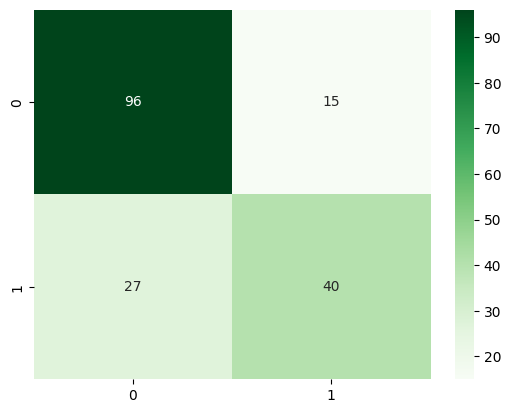

In [72]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens")